In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os

In [5]:
train_path = "/content/drive/MyDrive/waste/DATASET/DATASET/TRAIN"
test_path = "/content/drive/MyDrive/waste/DATASET/DATASET/TEST"

Import Libraries

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from glob import glob
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
import cv2
import numpy as np

Visualization

In [7]:
x_data = []
y_data = []

# Loop through categories and files in the training path, reading images and labels.
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

# Create a Pandas DataFrame to store image data and labels.
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 12580/12580 [03:24<00:00, 61.46it/s] 


In [8]:
# Count the number of data points.
data.shape

(22587, 2)

In [9]:
# Count the number of data points.
from collections import Counter
Counter(y_data)

Counter({'R': 10007, 'O': 12580})

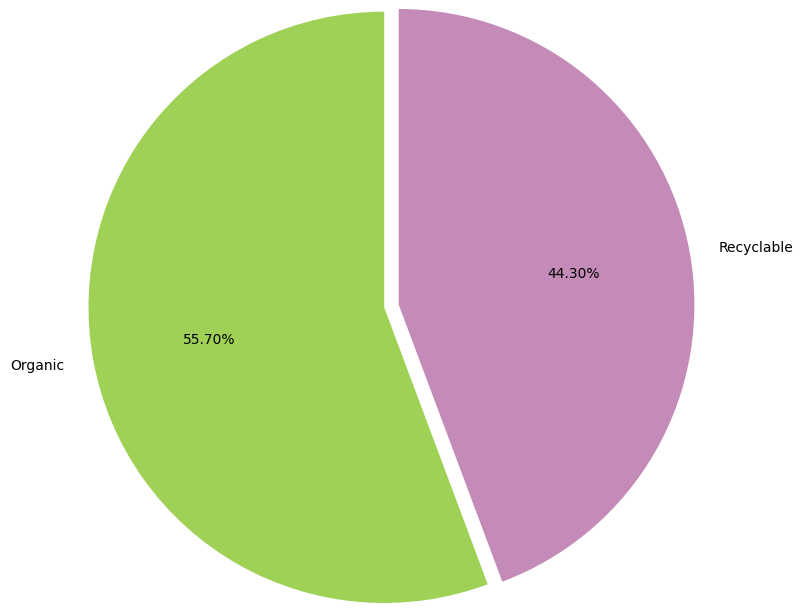

In [10]:
# Create a pie chart to visualize the distribution of labels.
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

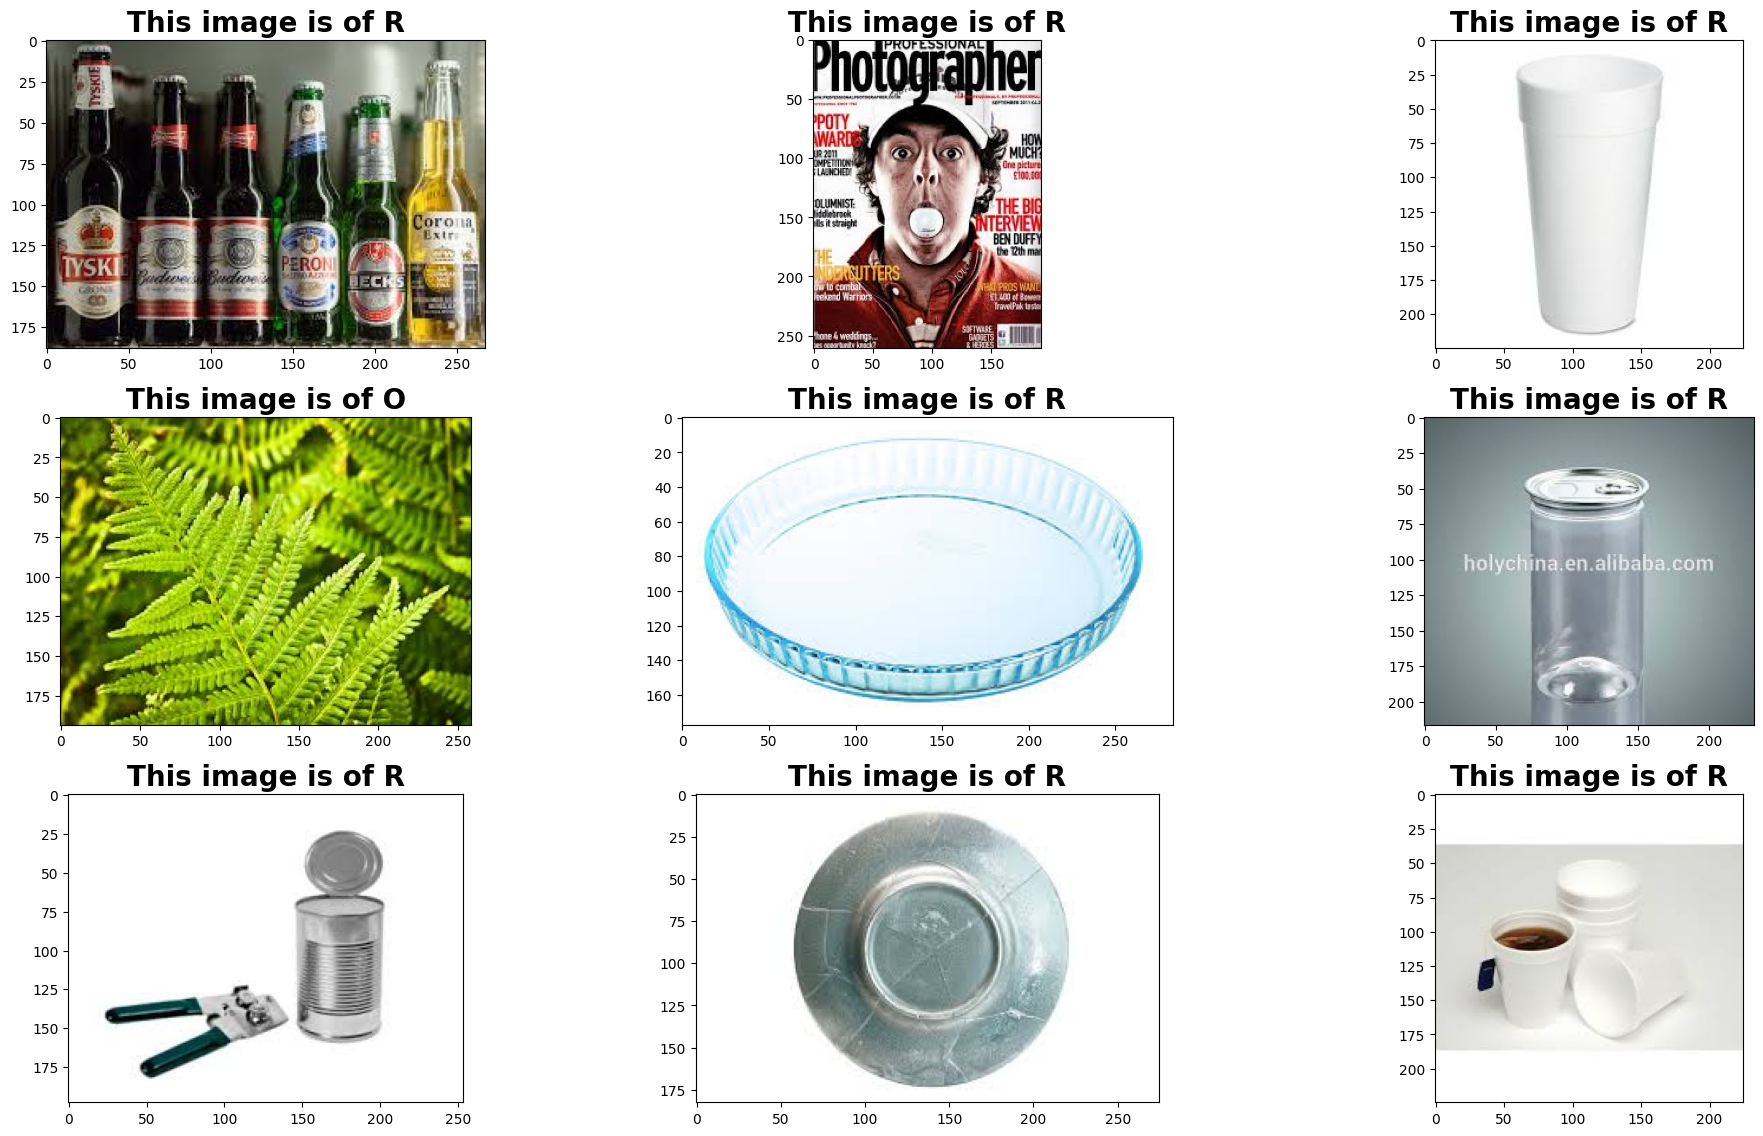

In [11]:
# Display a grid of random images with their corresponding labels.
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

+ O -> Organic

+ R -> Recyclable

In [12]:
# Define the number of classes (number of unique labels).
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


Convolutional Neural Network - CNN

In [13]:
# Create a Sequential model for the CNN.
model = Sequential()

# Add convolutional layers with ReLU activation and max-pooling.
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

# Flatten the output and add fully connected layers with dropout.
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

# Compile the model with loss, optimizer, and metrics.
model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

# Set the batch size for training.
batch_size = 256

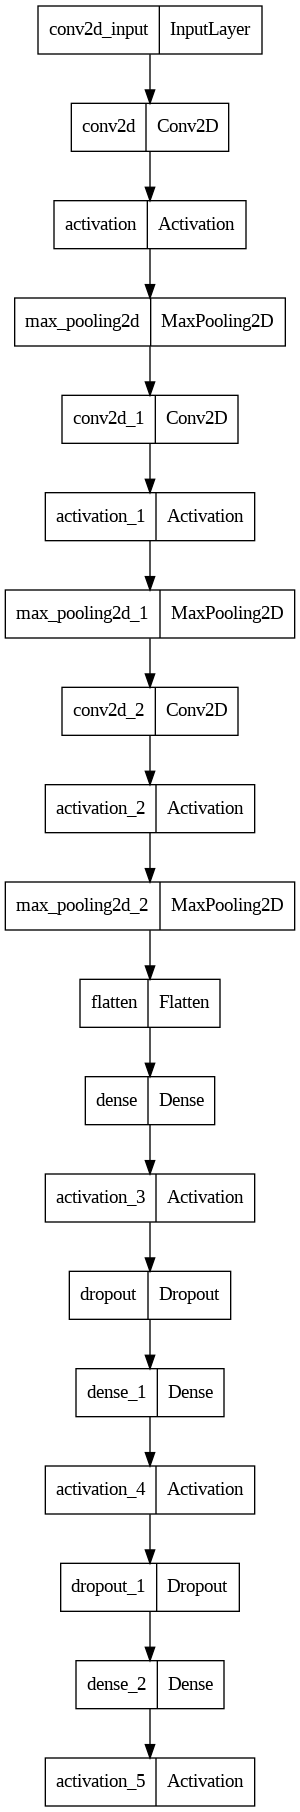

In [17]:
plot_model(model)

In [18]:
# Create data generators for training and testing.
train_datagen = ImageDataGenerator(rescale= 1./255)

In [19]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [20]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22587 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [22]:
# Train the model using a generator.
hist = model.fit_generator(
        generator = train_generator,
        epochs=10,
        validation_data = test_generator)

Epoch 1/10
89/89 [==============================] - 226s 3s/step - loss: 0.4109 - accuracy: 0.8277 - val_loss: 0.3512 - val_accuracy: 0.8448
Epoch 2/10
89/89 [==============================] - 86s 966ms/step - loss: 0.3725 - accuracy: 0.8488 - val_loss: 0.3131 - val_accuracy: 0.8739
Epoch 3/10
89/89 [==============================] - 85s 955ms/step - loss: 0.3477 - accuracy: 0.8595 - val_loss: 0.2950 - val_accuracy: 0.8782
Epoch 4/10
89/89 [==============================] - 85s 953ms/step - loss: 0.3195 - accuracy: 0.8740 - val_loss: 0.2633 - val_accuracy: 0.9005
Epoch 5/10
89/89 [==============================] - 85s 955ms/step - loss: 0.2918 - accuracy: 0.8838 - val_loss: 0.2884 - val_accuracy: 0.8926
Epoch 6/10
89/89 [==============================] - 86s 965ms/step - loss: 0.2630 - accuracy: 0.8984 - val_loss: 0.2905 - val_accuracy: 0.8878
Epoch 7/10
89/89 [==============================] - 85s 950ms/step - loss: 0.2316 - accuracy: 0.9105 - val_loss: 0.2873 - val_accuracy: 0.9017
E

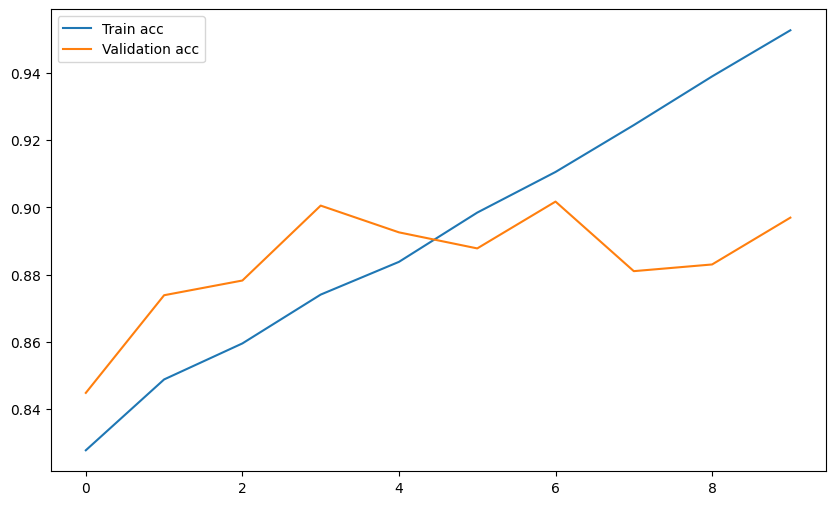

In [23]:
# Plot training and validation accuracy.
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

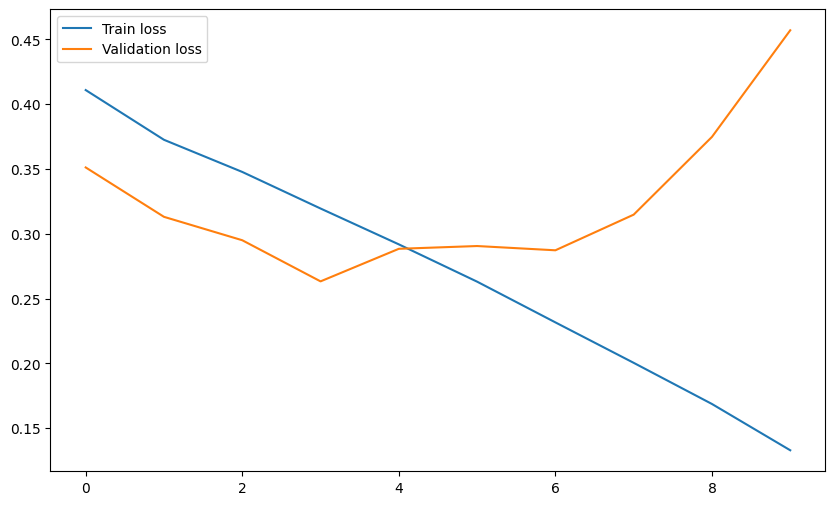

In [24]:
# Plot training and validation accuracy.
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

8/8 [==============================] - 1s 16ms/step


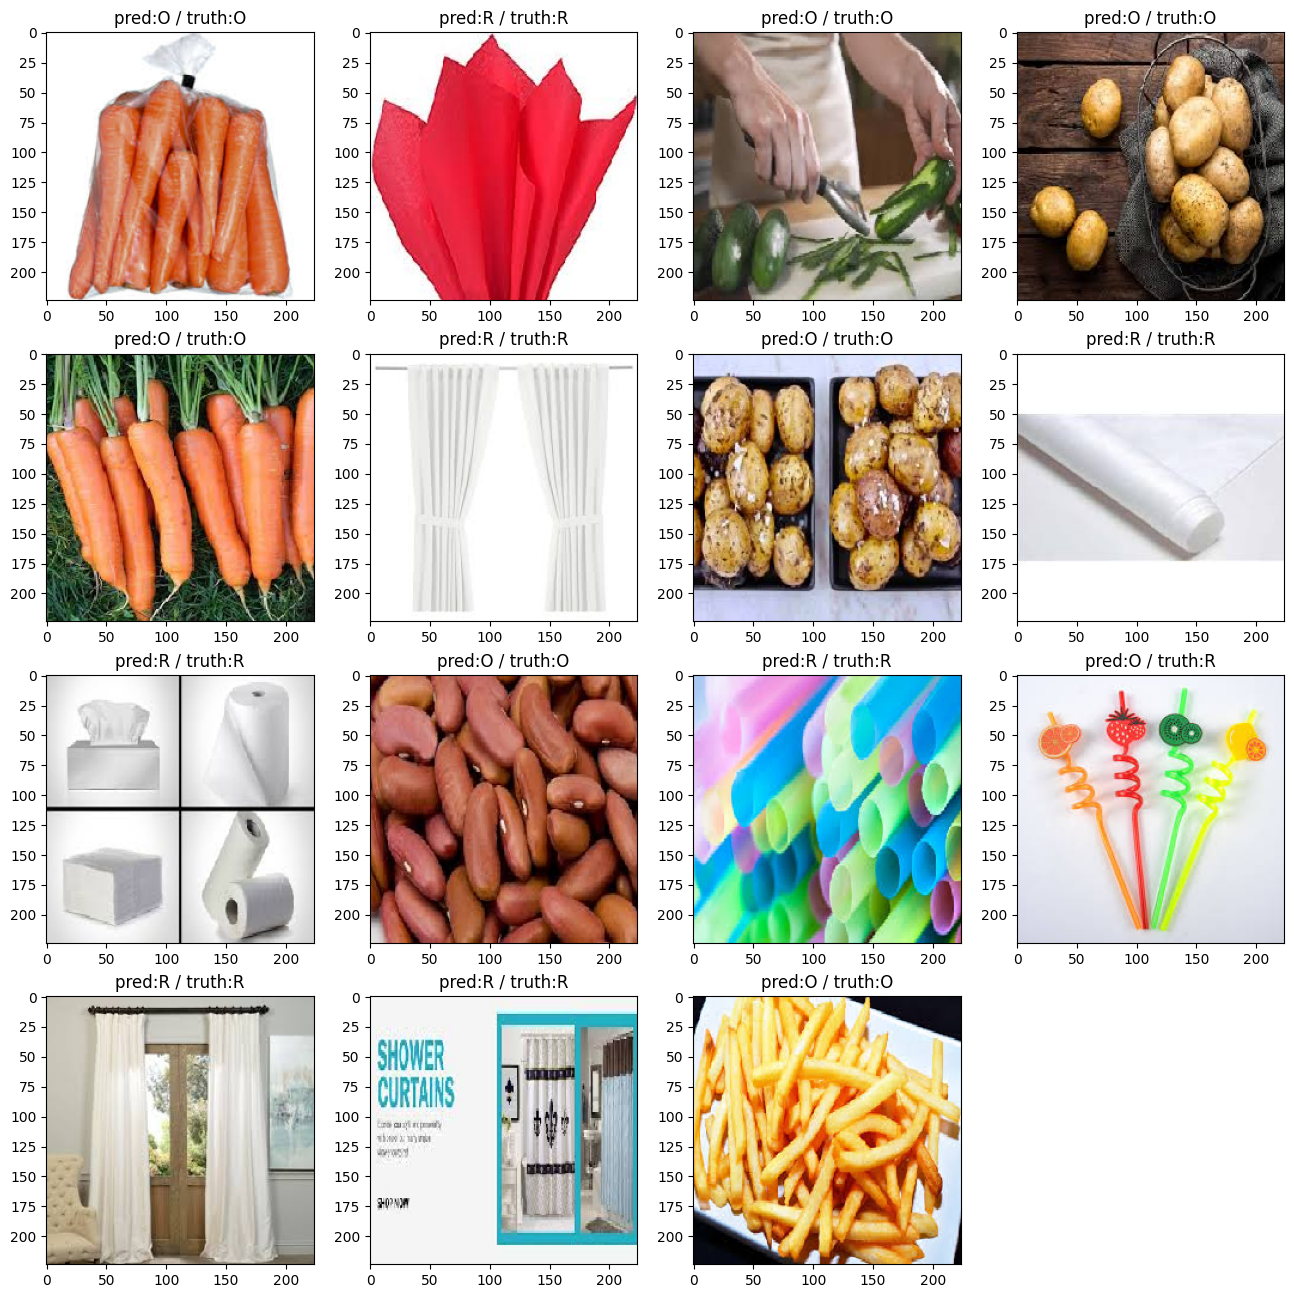

In [25]:
# Get a batch of test data and labels.
test_x, test_y = test_generator.__getitem__(1)

# Get a batch of test data and labels.
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

# Make predictions on the test data.
preds = model.predict(test_x)

# Display a grid of test images with their predicted and true labels.
plt.figure(figsize=(16, 16))
for i in range(15):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

In [29]:
# Save the trained model to a file
model.save('waste.h5')